HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

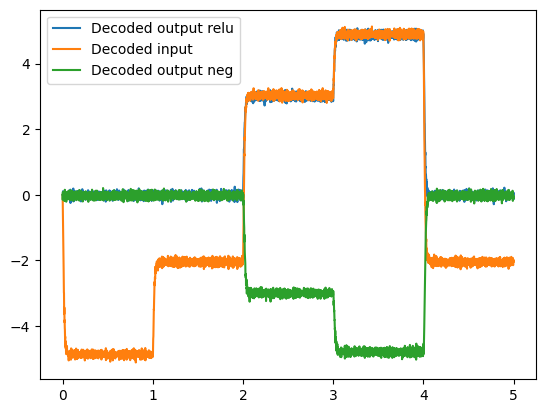

In [10]:
# Lab 1
import matplotlib.pyplot as plt
import numpy as np
import nengo

from nengo.processes import Piecewise


model = nengo.Network(label="Lab 1")

# create a decoded estamite of the input
with model:
    piecewise = Piecewise(
        {0: -5, 1: -2, 2: 3, 3: 5, 4: -2}
    )  # inport the piecewise function

    input = nengo.Node(piecewise)  # create the input node for the piecewise function

    dinput = nengo.Ensemble(100, dimensions=1, radius=5)  # create the ensemble

    nengo.Connection(input, dinput)  # connect the input node to the ensemble

    dinputprobe = nengo.Probe(
        dinput, synapse=0.01
    )  # create a probe for the decoded estamate of the input
# Create the relu ensemble
with model:
    Arelu = nengo.Ensemble(
        100, dimensions=1, radius=5
    )  # create the ensemble Arelu to perform the relu function

    inputA = nengo.Node(piecewise)  # create the input node

    def relu(x):  # define the relu function
        return max(0, x)

    nengo.Connection(
        inputA, Arelu, function=relu
    )  # connect the input node to the ensemble with relu funciton for decoding

    inputA_probe = nengo.Probe(inputA)  # create a probe for the input node
    Arelu_probe = nengo.Probe(
        Arelu, synapse=0.01
    )  # create a probe for the Arelu ensemble

# create the -x ensemble
with model:

    def neg(x):  # create a function that returns the negative of x
        return -x

    Aneg = nengo.Ensemble(100, dimensions=1, radius=5)  # create the ensemble

    nengo.Connection(
        Arelu, Aneg, function=neg
    )  # connect the two ensembles (relu and neg)

    Aneg_probe = nengo.Probe(
        Aneg, synapse=0.01
    )  # create a probe for the negative ensemble

# run the model
with nengo.Simulator(model) as sim:
    sim.run(5)

# plot the stuff
plt.figure()
plt.plot(
    sim.trange(), sim.data[Arelu_probe], label="Decoded output relu"
)  # plot the decoded output of the relu ensemble
plt.plot(
    sim.trange(), sim.data[dinputprobe], label="Decoded input"
)  # plot the input (piecewise function)
plt.plot(
    sim.trange(), sim.data[Aneg_probe], label="Decoded output neg"
)  # plot the decoded output of the negative ensemble which used the relu as input
plt.legend()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

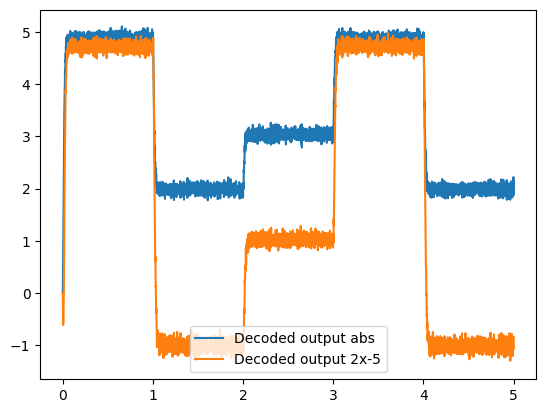

In [11]:
# on the other side of block diagram we have the abs function
with model:
    Babs = nengo.Ensemble(
        100, dimensions=1, radius=5
    )  # create the ensemble for the abs function

    inputB = nengo.Node(
        piecewise
    )  # create the input node (using same piecewise function as before)

    def abs(x):  # create the abs function
        return np.abs(x)

    nengo.Connection(
        inputB, Babs, function=abs
    )  # connect the input node to the ensemble with abs function for decoding

# probe the input and output of the abs function
with model:
    inputB_probe = nengo.Probe(inputB)
    Babs_probe = nengo.Probe(Babs, synapse=0.01)

# create the 2x-5 funciton ensemble
with model:

    def fx(x):  # create the 2x-5 function
        return (2 * x) - 5

    Cfx = nengo.Ensemble(100, dimensions=1, radius=5)

    nengo.Connection(
        Babs, Cfx, function=fx
    )  # connect the abs ensemble to the 2x-5 ensemble

    Cfx_probe = nengo.Probe(Cfx, synapse=0.01)  # create a probe for the 2x-5 ensemble


with nengo.Simulator(model) as sim:  # run the model
    sim.run(5)

# plot the stuff
plt.figure()
plt.plot(sim.trange(), sim.data[Babs_probe], label="Decoded output abs")
plt.plot(sim.trange(), sim.data[Cfx_probe], label="Decoded output 2x-5")
plt.legend()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

(-7.0, 7.0)

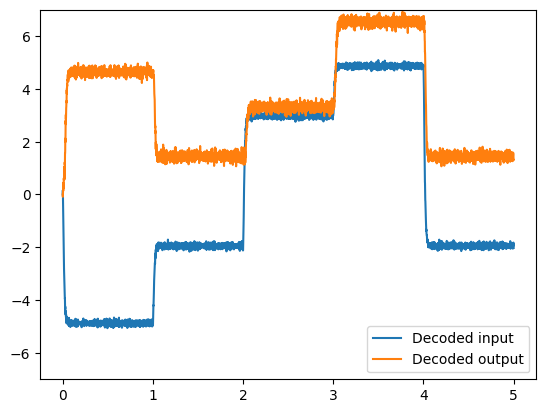

In [14]:
# combine the two sides of the block diagram
with model:
    Dcombined = nengo.Ensemble(
        100, dimensions=2, radius=7
    )  # create the ensemble for the combined function radius~sqrt(5^2+5^2)
    prod = nengo.Ensemble(
        100, dimensions=1, radius=7
    )  # create the ensemble for the product of the two sides of the block diagram

    def norm(x):
        return np.linalg.norm(
            x
        )  # create a function that returns the norm of the input vector

    nengo.Connection(
        Aneg, Dcombined[0]
    )  # connect the negative ensemble to the combined ensemble
    nengo.Connection(
        Cfx, Dcombined[1]
    )  # connect the 2x-5 ensemble to the combined ensemble

    nengo.Connection(
        Dcombined, prod, function=norm
    )  # connect the combined ensemble to the product ensemble

    prod_probe = nengo.Probe(
        prod, synapse=0.01
    )  # create a probe for the product ensemble

with nengo.Simulator(model) as sim:  # run the model
    sim.run(5)

# plot the stuff
plt.figure()
plt.plot(sim.trange(), sim.data[dinputprobe], label="Decoded input")
plt.plot(sim.trange(), sim.data[prod_probe], label="Decoded output")
plt.legend()
plt.ylim(-7, 7)